In [ ]:
import pandas as pd

df = pd.read_csv("/content/Bitcoin Historical Data.csv")
df = df.drop(columns=['Date'])

df['Vol.'] = df['Vol.'].str.replace('K', '').astype(float) * 1000
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

for column in df.columns:
  if column != 'Vol.' and column != 'Change %':
    df[column] = df[column].astype(str).str.replace(',', '').astype(float)

df

,Price,Open,High,Low,Vol.,Change %
0,60984.6,60826.6,61117.0,60806.6,22730.0,0.26
1,60826.6,60796.8,61487.5,60499.3,27500.0,0.05
2,60796.9,63074.3,63454.3,60251.8,79330.0,-3.61
3,63075.0,61207.3,63413.3,60671.4,64220.0,3.05
4,61207.5,62304.9,62997.4,60894.2,56470.0,-1.78
...,...,...,...,...,...,...
493,16829.8,16852.2,16877.9,16772.3,178960.0,-0.13
494,16852.1,16674.2,16976.5,16656.5,247390.0,1.07
495,16674.2,16673.1,16773.2,16607.2,178730.0,0.00
496,16674.3,16618.4,16766.9,16551.0,136030.0,0.34


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
  return np.maximum(0, x)

def initialize_population(n, input_dim, hidden_dim1, hidden_dim2, output_dim):
  population = []
  # Inisialisasi bobot
  for _ in range(n):
    W1 = np.random.uniform(-2, 2, size=(input_dim, hidden_dim1))
    W2 = np.random.uniform(-2, 2, size=(hidden_dim1, hidden_dim2))
    W3 = np.random.uniform(-2, 2, size=(hidden_dim2, output_dim))
    population.append([W1, W2, W3])
  return population

def compute_loss(weights, inputs, targets):
  W1, W2, W3 = weights[0], weights[1], weights[2]
  layer1_output = relu(np.dot(inputs, W1))
  layer2_output = relu(np.dot(layer1_output, W2))
  layer3_input = np.dot(layer2_output, W3)
  predictions = layer3_input.flatten()
  loss = np.mean(np.square(predictions - targets))
  return loss

def scout_bee_search(weights, inputs, targets, max_trials=5):
  # Mencari solusi terbaik di sekitar food source
  best_weights = weights
  best_loss = compute_loss(weights, inputs, targets)

  for _ in range(max_trials):
    trial_weights = perturb_solution(weights)
    trial_loss = compute_loss(trial_weights, inputs, targets)
    if trial_loss < best_loss:
      best_loss = trial_loss
      best_weights = trial_weights

  return best_weights, best_loss

def perturb_solution(weights, perturb_factor=0.1):
  # Menambahkan variasi kecil pada solusi yang ada
  perturbed_weights = []
  for layer_weights in weights:
    perturbed_layer = layer_weights + perturb_factor * np.random.uniform(-2, 2, size=layer_weights.shape)
    perturbed_weights.append(perturbed_layer)
  return perturbed_weights

def train_with_abc(inputs, targets, input_dim, hidden_dim1, hidden_dim2, output_dim, population_size=20, iterations=100, limit=5):
  # Pelatihan jaringan menggunakan algoritma ABC
  best_weights = None
  best_loss = float('inf')
  best_accuracy = 0.0

  population = initialize_population(population_size, input_dim, hidden_dim1, hidden_dim2, output_dim)
  history_loss = []
  history_acc = []

  for epoch in range(iterations):
    for i, bee in enumerate(population):
      bee, loss = scout_bee_search(bee, inputs, targets)
      if loss < best_loss:
        best_loss = loss
        best_weights = bee

    predicted = predict(inputs, best_weights)
    loss = compute_loss(best_weights, inputs, targets)
    history_loss.append(loss)

    if epoch % limit == 0:
      population = [perturb_solution(bee) for bee in population]

  return best_weights, history_loss

def predict(inputs, weights):
  W1, W2, W3 = weights[0], weights[1], weights[2]
  layer1_output = relu(np.dot(inputs, W1))
  layer2_output = relu(np.dot(layer1_output, W2))
  layer3_input = np.dot(layer2_output, W3)
  layer3_output = softmax(layer3_input)
  return layer3_output

In [ ]:
X = df[['Open', 'High', 'Low', 'Vol.', 'Change %']]
y = df['Price']

# 8 kedua hidden layer

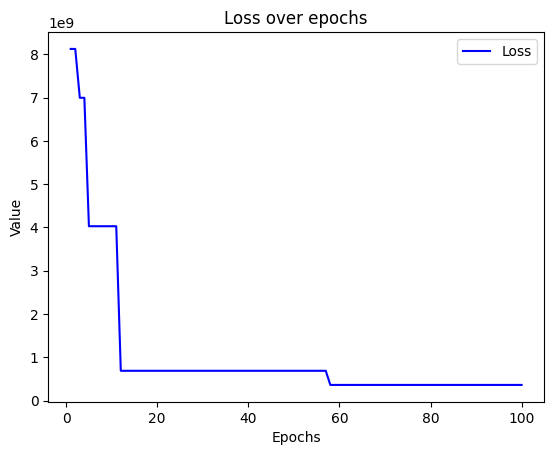

In [ ]:
best_weights_reg, history_loss_reg = train_with_abc(X, y, input_dim=X.shape[1],
                                                    hidden_dim1=8, hidden_dim2=8, output_dim=1,
                                                    iterations=100)

epochs = range(1, len(history_loss_reg) + 1)
plt.plot(epochs, history_loss_reg, 'b', label='Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

# 8 dan 16 hidden layer

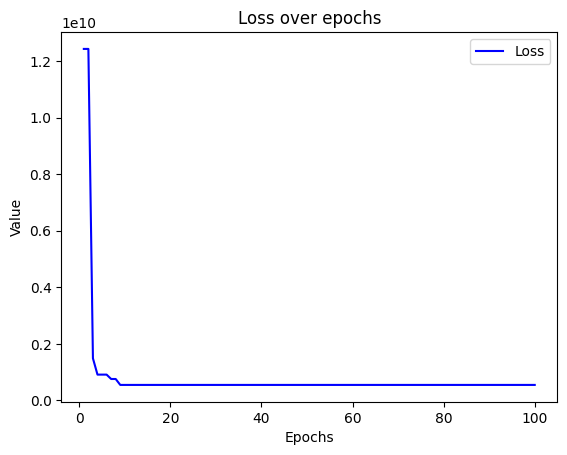

In [ ]:
best_weights_reg, history_loss_reg = train_with_abc(X, y, input_dim=X.shape[1],
                                                    hidden_dim1=8, hidden_dim2=16, output_dim=1,
                                                    iterations=100)

epochs = range(1, len(history_loss_reg) + 1)
plt.plot(epochs, history_loss_reg, 'b', label='Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

# 16 dan 8 hidden layer

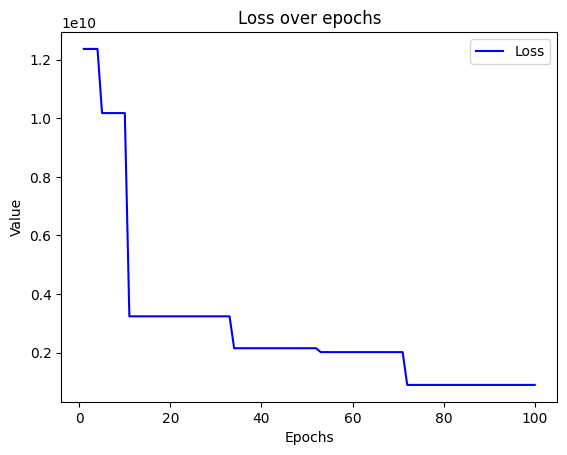

In [ ]:
best_weights_reg, history_loss_reg = train_with_abc(X, y, input_dim=X.shape[1],
                                                    hidden_dim1=16, hidden_dim2=8, output_dim=1,
                                                    iterations=100)

epochs = range(1, len(history_loss_reg) + 1)
plt.plot(epochs, history_loss_reg, 'b', label='Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

# 16 kedua hidden layer

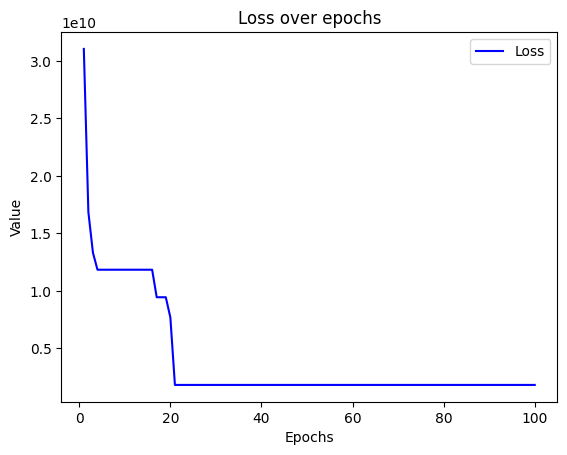

In [ ]:
best_weights_reg, history_loss_reg = train_with_abc(X, y, input_dim=X.shape[1],
                                                    hidden_dim1=16, hidden_dim2=16, output_dim=1,
                                                    iterations=100)

epochs = range(1, len(history_loss_reg) + 1)
plt.plot(epochs, history_loss_reg, 'b', label='Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()